# **PROJECT 2: AN ANALYSIS OF MOBILE SALES**

## 1. Import Necessary Libraries

In [202]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = "notebook_connected"

## 2. Load Dataset

In [203]:
df = pd.read_csv("/Users/apple/Downloads/Mobiles_Dataset.csv")
df.head(10)

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...
5,"OnePlus 12R (Cool Blue, 128 GB)","₹39,999","₹38,989",4.5,"4,278 Ratings",292 Reviews,8,128,6.78,50MP,8 GB RAM | 128 GB ROM17.22 cm (6.78 inch) Disp...,https://www.flipkart.com/oneplus-12r-cool-blue...
6,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)","₹17,490","₹10,990",4.2,"45,538 Ratings","2,989 Reviews",4,128,6.60,50MP + 2MP,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,https://www.flipkart.com/samsung-galaxy-f14-5g...
7,"CMF by Nothing Phone 1 (Blue, 128 GB)","₹19,999","₹15,999",4.4,"8,057 Ratings",701 Reviews,6,128,6.67,50MP + 2MP,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,https://www.flipkart.com/cmf-nothing-phone-1-b...
8,"CMF by Nothing Phone 1 (Blue, 128 GB)","₹21,999","₹17,999",4.3,"2,355 Ratings",181 Reviews,8,128,6.67,50MP + 2MP,8 GB RAM | 128 GB ROM | Expandable Upto 2 TB16...,https://www.flipkart.com/cmf-nothing-phone-1-b...
9,"vivo Y200e 5G (Black Diamond, 128 GB)","₹25,999","₹20,999",4.3,687 Ratings,36 Reviews,8,128,6.67,50MP + 2MP,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,https://www.flipkart.com/vivo-y200e-5g-black-d...


## 3. Explore Dataset

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         984 non-null    object 
 1   Actual price         984 non-null    object 
 2   Discount price       984 non-null    object 
 3   Stars                984 non-null    float64
 4   Rating               984 non-null    object 
 5   Reviews              984 non-null    object 
 6   RAM (GB)             984 non-null    object 
 7   Storage (GB)         984 non-null    object 
 8   Display Size (inch)  984 non-null    float64
 9   Camera               908 non-null    object 
 10  Description          984 non-null    object 
 11  Link                 984 non-null    object 
dtypes: float64(2), object(10)
memory usage: 92.4+ KB


In [205]:
df.isnull().sum()

Product Name            0
Actual price            0
Discount price          0
Stars                   0
Rating                  0
Reviews                 0
RAM (GB)                0
Storage (GB)            0
Display Size (inch)     0
Camera                 76
Description             0
Link                    0
dtype: int64

## 4. Data Cleaning

In [206]:
#Extract Brand Name from Product Name
df['Brand'] = df['Product Name'].str.extract(r'^(\w+)')
df['Brand'] = df['Brand'].astype(str).apply(lambda x: x.title())
df['Product Name'] = df['Product Name'].astype(str).apply(lambda x: x.title())

#Remove the money symbol in all rows of columns Actual price and Discount price
df['Actual price ₹'] = df['Actual price'].str.replace('[₹,]','', regex = True)
df['Discount price ₹'] = df['Discount price'].str.replace('[₹,]','', regex = True)
df = df.drop(columns=['Actual price','Discount price'])

#Handle NIL values in Actual and Discount price columns
df['Actual price ₹'] = pd.to_numeric(df['Actual price ₹'], errors ='coerce')
df['Actual price ₹'] = df['Actual price ₹'].replace('NIL', df['Actual price ₹'].mean())
df['Actual price ₹'] = df['Actual price ₹'].fillna(df['Actual price ₹'].mean())
df['Discount price ₹'] = pd.to_numeric(df['Discount price ₹'], errors ='coerce')
df['Discount price ₹'] = df['Discount price ₹'].replace('NIL', df['Discount price ₹'].mean())
df['Discount price ₹'] = df['Discount price ₹'].fillna(df['Discount price ₹'].mean())

#Create Discount amount (%)
df['Discount amount (%)'] = round((df['Actual price ₹'] - df['Discount price ₹'])/df['Actual price ₹']*100,2)

#Remove Ratings and Reviews in two columns Ratings and Reviews
df['Number of Rating'] = df['Rating'].str.replace('[Ratings,]','', regex = True)
df['Number of Reviews'] = df['Reviews'].str.replace('[Reviews,]','', regex = True)
df = df.drop(columns=['Rating','Reviews'])

#Handle NIL values in the RAM (GB) (based on information of Description)
def extract_ram(description):
    extract_ram = re.search(r'(\d+)\s*(GB|MB)\s*RAM', description)
    ram = int(extract_ram.group(1)) if extract_ram else None
    return ram
df['RAM (GB)'] = df['Description'].apply(extract_ram)

#Handle NIL values in the Storage (GB) (based on information of Description)
def extract_storage(description):
    extract_storage = re.search(r'(\d+)\s*(GB|MB)\s*(?:ROM|Internal|Storage)', description)
    storage = int(extract_storage.group(1)) if extract_storage else None
    return storage
df['Storage (GB)'] = df['Description'].apply(extract_storage)

#Replace | to + in the Camera column
df['Camera'] = df['Camera'].str.replace('|','+')
#Handle Null values in the Camera column
df['Camera'] = df['Camera'].apply(lambda x: 'Not Present' if pd.isna(x) or x =='' else x)
df['Camera'] = df['Camera'].str.replace('0MP + 0MP','Not Present')

#Create Star Category and Price Category columns
df['Star Category'] = pd.cut(df['Stars'], bins = [0,3.4, 3.8, 4.2, 4.6, 5], labels =['Poor', 'Not Preferred', 'Fair', 'Good', 'Excellent'])
df['Price Category'] = pd.cut(df['Actual price ₹'], bins = [0, 10000, 20000, 30000, 40000, df['Actual price ₹'].max()], labels =['Low', 'Mid', 'High', 'Premium', 'Luxury'])

#Extract Main and Second Cameras
def extract_main_cam(camera):
    extract_main_camera = re.search(r'(\d+)MP\s*(\+)?\s*(\d+MP)?', camera)
    main_camera = int(extract_main_camera.group(1)) if extract_main_camera and camera != 'Not Present' else np.nan
    return main_camera
df['Main Camera'] = df['Camera'].apply(extract_main_cam)

def extract_second_cam(camera):
    extract_second_camera = re.search(r'(\d+)MP\s*(\+)?\s*(\d+)(MP)', camera)
    second_camera = int(extract_second_camera.group(3)) if extract_second_camera and camera != 'Not Present' else np.nan
    return second_camera
df['Second Camera'] = df['Camera'].apply(extract_second_cam)

#Define the desired column order
desired_order = ['Product Name', 'Brand', 'Price Category', 'Actual price ₹', 'Discount price ₹', 'Discount amount (%)', 'Stars', 'Star Category', 'Number of Rating', 'Number of Reviews', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)', 'Camera', 'Main Camera', 'Second Camera', 'Description', 'Link']
df = df[desired_order]

#Drop the Description and Link columns
df = df.drop(columns =['Description', 'Link'])

#Duplicate the original data for further price analysis (still contain Apple and other brands)
df_dup = df.copy()

#Handle the remaining null values in columns
print(df.isnull().sum())
df = df.dropna()

df_dup.head(10)


Product Name             0
Brand                    0
Price Category           0
Actual price ₹           0
Discount price ₹         0
Discount amount (%)      0
Stars                    0
Star Category            0
Number of Rating         0
Number of Reviews        0
RAM (GB)                55
Storage (GB)             4
Display Size (inch)      0
Camera                   0
Main Camera             90
Second Camera          388
dtype: int64


,Product Name,Brand,Price Category,Actual price ₹,Discount price ₹,Discount amount (%),Stars,Star Category,Number of Rating,Number of Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Main Camera,Second Camera
0,"Apple Iphone 15 (Green, 128 Gb)",Apple,Luxury,79600.0,65999.0,17.09,4.6,Good,44793,2402,NaN,128.0,6.10,48MP + 12MP,48.0,12.0
1,"Apple Iphone 15 (Blue, 128 Gb)",Apple,Luxury,79600.0,65999.0,17.09,4.6,Good,44793,2402,NaN,128.0,6.10,48MP + 12MP,48.0,12.0
2,"Apple Iphone 15 (Black, 128 Gb)",Apple,Luxury,79600.0,65999.0,17.09,4.6,Good,44793,2402,NaN,128.0,6.10,48MP + 12MP,48.0,12.0
3,"Oneplus N20 Se (Jade Wave, 128 Gb)",Oneplus,Mid,19999.0,11489.0,42.55,4.0,Fair,1005,41,4.0,128.0,6.56,50MP,50.0,NaN
4,"Oneplus N20 Se (Blue Oasis, 64 Gb)",Oneplus,Mid,16999.0,12999.0,23.53,4.0,Fair,1005,41,4.0,64.0,6.56,50MP,50.0,NaN
5,"Oneplus 12R (Cool Blue, 128 Gb)",Oneplus,Premium,39999.0,38989.0,2.53,4.5,Good,4278,292,8.0,128.0,6.78,50MP,50.0,NaN
6,"Samsung Galaxy F14 5G (Goat Green, 128 Gb)",Samsung,Mid,17490.0,10990.0,37.16,4.2,Fair,45538,2989,4.0,128.0,6.60,50MP + 2MP,50.0,2.0
7,"Cmf By Nothing Phone 1 (Blue, 128 Gb)",Cmf,Mid,19999.0,15999.0,20.00,4.4,Good,8057,701,6.0,128.0,6.67,50MP + 2MP,50.0,2.0
8,"Cmf By Nothing Phone 1 (Blue, 128 Gb)",Cmf,High,21999.0,17999.0,18.18,4.3,Good,2355,181,8.0,128.0,6.67,50MP + 2MP,50.0,2.0
9,"Vivo Y200E 5G (Black Diamond, 128 Gb)",Vivo,High,25999.0,20999.0,19.23,4.3,Good,687,36,8.0,128.0,6.67,50MP + 2MP,50.0,2.0


In [207]:
df['RAM (GB)'].unique()
df['Main Camera'].value_counts()
#Drop unreal RAM and Main Camera columns
df = df[df['RAM (GB)'] != 46875]
df_dup = df_dup[df_dup['RAM (GB)'] != 46875]
df = df[df['Main Camera'] != 108.0]
df_dup = df_dup[df_dup['Main Camera'] != 108.0]
#Print cleaned dataser
df.head(10)

,Product Name,Brand,Price Category,Actual price ₹,Discount price ₹,Discount amount (%),Stars,Star Category,Number of Rating,Number of Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Main Camera,Second Camera
6,"Samsung Galaxy F14 5G (Goat Green, 128 Gb)",Samsung,Mid,17490.0,10990.0,37.16,4.2,Fair,45538,2989,4.0,128.0,6.60,50MP + 2MP,50.0,2.0
7,"Cmf By Nothing Phone 1 (Blue, 128 Gb)",Cmf,Mid,19999.0,15999.0,20.00,4.4,Good,8057,701,6.0,128.0,6.67,50MP + 2MP,50.0,2.0
8,"Cmf By Nothing Phone 1 (Blue, 128 Gb)",Cmf,High,21999.0,17999.0,18.18,4.3,Good,2355,181,8.0,128.0,6.67,50MP + 2MP,50.0,2.0
9,"Vivo Y200E 5G (Black Diamond, 128 Gb)",Vivo,High,25999.0,20999.0,19.23,4.3,Good,687,36,8.0,128.0,6.67,50MP + 2MP,50.0,2.0
10,"Vivo Y200E 5G (Black Diamond, 128 Gb)",Vivo,High,23999.0,19999.0,16.67,4.2,Fair,267,13,6.0,128.0,6.67,50MP + 2MP,50.0,2.0
11,"Oppo F25 Pro 5G (Ocean Blue, 128 Gb)",Oppo,High,28999.0,23999.0,17.24,4.3,Good,3629,299,8.0,128.0,6.70,64MP + 8MP,64.0,8.0
12,"Motorola G85 5G (Urban Grey, 128 Gb)",Motorola,High,20999.0,17999.0,14.29,4.5,Good,9300,537,8.0,128.0,6.67,50MP + 8MP,50.0,8.0
13,"Motorola G85 5G (Urban Grey, 128 Gb)",Motorola,High,20999.0,17999.0,14.29,4.5,Good,9300,537,8.0,128.0,6.67,50MP + 8MP,50.0,8.0
15,"Motorola G64 5G (Ice Lilac, 256 Gb)",Motorola,Mid,19999.0,16999.0,15.00,4.2,Fair,12943,784,12.0,256.0,6.50,8MP + 16MP,8.0,16.0
17,"Nothing Phone (2A) 5G (Blue, 128 Gb)",Nothing,High,25999.0,23999.0,7.69,4.4,Good,40281,4089,8.0,128.0,6.70,50MP + 32MP,50.0,32.0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 6 to 977
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Product Name         527 non-null    object  
 1   Brand                527 non-null    object  
 2   Price Category       527 non-null    category
 3   Actual price ₹       527 non-null    float64 
 4   Discount price ₹     527 non-null    float64 
 5   Discount amount (%)  527 non-null    float64 
 6   Stars                527 non-null    float64 
 7   Star Category        527 non-null    category
 8   Number of Rating     527 non-null    object  
 9   Number of Reviews    527 non-null    object  
 10  RAM (GB)             527 non-null    float64 
 11  Storage (GB)         527 non-null    float64 
 12  Display Size (inch)  527 non-null    float64 
 13  Camera               527 non-null    object  
 14  Main Camera          527 non-null    float64 
 15  Second Camera        527 non

In [209]:
#Convert to category and int types in the cleaned dataset
df = df.astype({'Product Name': 'category', 'Brand':'category', 'Actual price ₹':'int',
                 'Discount price ₹': 'int', 'Number of Rating': 'int','Number of Reviews':'int', 'RAM (GB)': 'int', 'Storage (GB)': 'int', 
                 'Display Size (inch)': 'int', 'Main Camera': 'int', 'Second Camera': 'int'})
print(df.info())
print(df.describe(include= "all"))

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 6 to 977
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Product Name         527 non-null    category
 1   Brand                527 non-null    category
 2   Price Category       527 non-null    category
 3   Actual price ₹       527 non-null    int64   
 4   Discount price ₹     527 non-null    int64   
 5   Discount amount (%)  527 non-null    float64 
 6   Stars                527 non-null    float64 
 7   Star Category        527 non-null    category
 8   Number of Rating     527 non-null    int64   
 9   Number of Reviews    527 non-null    int64   
 10  RAM (GB)             527 non-null    int64   
 11  Storage (GB)         527 non-null    int64   
 12  Display Size (inch)  527 non-null    int64   
 13  Camera               527 non-null    object  
 14  Main Camera          527 non-null    int64   
 15  Second Camera        527 non

In [210]:
df_dup.isnull().sum()

Product Name             0
Brand                    0
Price Category           0
Actual price ₹           0
Discount price ₹         0
Discount amount (%)      0
Stars                    0
Star Category            0
Number of Rating         0
Number of Reviews        0
RAM (GB)                55
Storage (GB)             4
Display Size (inch)      0
Camera                   0
Main Camera             90
Second Camera          368
dtype: int64

In [211]:
#Convert to category and int types in the not cleaned dataset
df_dup = df_dup.astype({'Product Name': 'category', 'Brand':'category', 'Actual price ₹':'int',
                 'Discount price ₹': 'int', 'Number of Rating': 'int','Number of Reviews':'int', 
                 'Display Size (inch)': 'int'})
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 0 to 983
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Product Name         934 non-null    category
 1   Brand                934 non-null    category
 2   Price Category       934 non-null    category
 3   Actual price ₹       934 non-null    int64   
 4   Discount price ₹     934 non-null    int64   
 5   Discount amount (%)  934 non-null    float64 
 6   Stars                934 non-null    float64 
 7   Star Category        934 non-null    category
 8   Number of Rating     934 non-null    int64   
 9   Number of Reviews    934 non-null    int64   
 10  RAM (GB)             879 non-null    float64 
 11  Storage (GB)         930 non-null    float64 
 12  Display Size (inch)  934 non-null    int64   
 13  Camera               934 non-null    object  
 14  Main Camera          844 non-null    float64 
 15  Second Camera        566 non

## 5. Data Visualization

### 5.1 Overview

In [212]:
# Create histograms for each numeric column
numeric_df = df_dup.select_dtypes(include =[float,int])
numeric_df = pd.DataFrame(numeric_df)
print(numeric_df)
numeric_df_columns = numeric_df.columns
for column in numeric_df.columns:
    fig = px.histogram(df_dup, x=column, title=f'Distribution of {column}', 
                       nbins=10, marginal='box')
    fig.update_layout(font_color="grey", font_size =12,
        title_font_color="black", title_font_size =24)
    fig.show()

     Actual price ₹  Discount price ₹  Discount amount (%)  Stars  \
0             79600             65999                17.09    4.6   
1             79600             65999                17.09    4.6   
2             79600             65999                17.09    4.6   
3             19999             11489                42.55    4.0   
4             16999             12999                23.53    4.0   
..              ...               ...                  ...    ...   
979            1499               967                35.49    4.0   
980            1499               975                34.96    4.0   
981            1499               975                34.96    4.0   
982            1499               930                37.96    4.0   
983            1499               967                35.49    4.0   

     Number of Rating  Number of Reviews  RAM (GB)  Storage (GB)  \
0               44793               2402       NaN         128.0   
1               44793              

In [213]:
#Calculate star category of price category
star_price = df_dup.groupby('Price Category')['Stars'].mean().round(1).sort_values().reset_index()
star_price['Star Category'] = pd.cut(star_price['Stars'], bins=[0, 3.4, 3.8, 4.2, 4.6, 5], labels=['Poor', 'Not Preferred', 'Fair', 'Good', 'Excellent'])
print(star_price)

#Calculate price category of star category
price_star = df_dup.groupby('Star Category')['Actual price ₹'].mean().astype(int).sort_values().reset_index()
price_star['Price Category'] = pd.cut(price_star['Actual price ₹'], bins = [0, 10000, 20000, 30000, 40000, df_dup['Actual price ₹'].max()], labels =['Low', 'Mid', 'High', 'Premium', 'Luxury'])
print(price_star)

categoryarray=[0,4.1,4.2,4.3,4.5]

#Visualize star category of price category
fig= make_subplots(rows=1, cols=2, subplot_titles=('Star Category of Price Category', 'Price Category of Star Category'))

fig.add_bar(x=['Low', 'Mid'], y=[4.1, 4.2], marker_color='cornflowerblue', name='Fair', row=1, col=1)
fig.add_bar(x=['High', 'Premium','Luxury'], y=[4.3, 4.3,4.5], marker_color='royalblue', name='Good', row=1, col=1)
fig.update_xaxes(title_text='Price Category', type='category', row=1, col=1)
fig.update_yaxes(title_text='Stars', type='category', categoryorder='array', categoryarray=categoryarray, row=1, col=1)

#Visualize price category of star category
#To see for example, if the rate is good, then customers are willing to pay which price category
fig.add_bar(x=['Poor', 'Not Preferred'], y=[1699, 7746], marker_color='yellowgreen', name='Low', row=1, col=2)
fig.add_bar(x=['Fair'], y=[16466], marker_color='olivedrab', name='Mid', row=1, col=2)
fig.add_bar(x=['Excellent', 'Good'], y=[33631,34918], marker_color='darkolivegreen', name='Premium',row=1, col=2)
fig.update_xaxes(title_text='Star Category', type='category', row=1, col=2)
fig.update_yaxes(title_text='Price', type='category', categoryorder='array', categoryarray=df['Actual price ₹'], row=1, col=2)

fig.update_layout(title='Price Category vs Star Category',title_font_size=24, title_font_color='black', font_size=12, font_color='grey', height=600)
fig.show()

  Price Category  Stars Star Category
0            Low    4.1          Fair
1            Mid    4.2          Fair
2           High    4.3          Good
3        Premium    4.3          Good
4         Luxury    4.5          Good
   Star Category  Actual price ₹ Price Category
0           Poor            1699            Low
1  Not Preferred            7746            Low
2           Fair           16466            Mid
3      Excellent           33631        Premium
4           Good           34918        Premium


In [214]:
#Visualize top 10 most common Display Size (inch)
most_common_display = df_dup['Display Size (inch)'].value_counts().reset_index()
most_common_display =most_common_display.rename(columns={'count':'Number of Display Size (inch)'})
most_common_display['Common Display Size Percentage']= (most_common_display['Number of Display Size (inch)']/len(df['Display Size (inch)'])*100).round(2)
most_common_display = pd.DataFrame(most_common_display)
print(most_common_display)

fig = px.pie(most_common_display,values='Common Display Size Percentage', names='Display Size (inch)', 
             template="plotly_white", color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title_font_size =24, title_text ='Percentage of Display Size (inch)', title_font_color="black", 
                  font_size=12,font_color="grey", height=500)

fig.show()


   Display Size (inch)  Number of Display Size (inch)  \
0                    6                            806   
1                    1                             62   
2                    2                             50   
3                    0                             10   
4                    7                              5   
5                    5                              1   

   Common Display Size Percentage  
0                          152.94  
1                           11.76  
2                            9.49  
3                            1.90  
4                            0.95  
5                            0.19  


### 5.2 Brand Analysis

In [215]:
#Calculate top 10 most common brand
most_common_brand = df_dup['Brand'].value_counts().sort_values(ascending = False).reset_index()
most_common_brand = most_common_brand.rename(columns={'count':'Most Common Brand Count','Brand':'Common Brand'})
most_common_brand = most_common_brand.head(10)
#Calculate top 10 least common brand
least_common_brand = df_dup['Brand'].value_counts().sort_values(ascending = True).reset_index()
least_common_brand = least_common_brand.rename(columns={'count':'Least Common Brand Count','Brand':'Not Common Brand'})
least_common_brand = least_common_brand.head(10)
#Turn into dataframe
most_least_common_brand = pd.concat([most_common_brand, least_common_brand], axis=1)
print(most_least_common_brand)

#Visualise by drawing 2 bar charts side by side to compare
fig = make_subplots(rows=1, cols=2, subplot_titles = ('10 Most Common Brands', '10 Least Common Brands'))
fig.add_bar(x=most_least_common_brand['Common Brand'], y=most_least_common_brand['Most Common Brand Count'], name='Most Common', marker_color='lightseagreen', row =1, col=1, text = most_least_common_brand['Most Common Brand Count'])
fig.add_bar(x=most_least_common_brand['Not Common Brand'], y=most_least_common_brand['Least Common Brand Count'], name ='Least Common', marker_color='olivedrab', row=1, col=2, text = most_least_common_brand['Least Common Brand Count'])

fig.update_traces(textposition='outside', texttemplate='%{text:.2s}', row=1, col=1)
fig.update_traces(textposition='outside', texttemplate='%{text:.1s}', row=1, col=2)
fig.update_xaxes(title_text ='Brand', row=1, col=1)
fig.update_xaxes(title_text ='Brand', row=1, col=2)
fig.update_yaxes(title_text ='Count', row=1, col=1)
fig.update_yaxes(title_text ='Count', row=1, col=2)
fig.update_layout(title='Most and Least Common Brands', font_color="grey", font_size =12, title_font_color="black", title_font_size =24, height=600)
fig.show()

  Common Brand  Most Common Brand Count Not Common Brand  \
0       Realme                      110            Honor   
1      Samsung                      102              Jio   
2        Redmi                       92              Vox   
3         Vivo                       91                I   
4         Oppo                       70        Blackzone   
5     Motorola                       61         Micromax   
6         Poco                       57              Cmf   
7      Infinix                       50           Xiaomi   
8         Itel                       48          Karbonn   
9        Apple                       39          Nothing   

   Least Common Brand Count  
0                         1  
1                         2  
2                         2  
3                         3  
4                         3  
5                         4  
6                         6  
7                         8  
8                         9  
9                        10  


In [216]:
#Calculate average star reviews of each brand and turn it into category
brand_star = df_dup.groupby('Brand')['Stars'].mean().round(1).sort_values().reset_index()
brand_star['Star Category'] = pd.cut(brand_star['Stars'], bins=[0, 3.4, 3.8, 4.2, 4.6, 5], labels=['Poor', 'Not Preferred', 'Fair', 'Good', 'Excellent'])
print(brand_star)

not_preferred_brand = brand_star[brand_star['Star Category']=='Not Preferred']
fair_brand = brand_star[brand_star['Star Category']=='Fair']
good_brand = brand_star[brand_star['Star Category']=='Good']

#Visualize average star category of each brand
#To see which one is most rated
fig= go.Figure()
fig.add_bar(x=not_preferred_brand['Brand'], y=not_preferred_brand['Stars'], marker_color='darkgrey', name='Not Preferred')
fig.add_bar(x=fair_brand['Brand'], y=fair_brand['Stars'], marker_color='turquoise', name='Fair')
fig.add_bar(x=good_brand['Brand'], y=good_brand['Stars'], marker_color='lightseagreen', name='Good')

fig.update_xaxes(type='category')
fig.update_yaxes(type='category', categoryorder='array', categoryarray=[0, 3.6, 3.7, 3.8, 3.9, 4.0, 4.2, 4.3, 4.4, 4.6])
fig.update_layout(title='Star Category (by Brand)',title_font_size=24, title_font_color='black', font_size=12, font_color='grey', height=600)
fig.show()

        Brand  Stars  Star Category
0         Vox    3.6  Not Preferred
1     Karbonn    3.7  Not Preferred
2         Jio    3.8  Not Preferred
3           I    3.8  Not Preferred
4       Nokia    3.9           Fair
5    Kechaoda    4.0           Fair
6        Itel    4.0           Fair
7    Micromax    4.0           Fair
8   Blackzone    4.0           Fair
9     Infinix    4.2           Fair
10      Honor    4.2           Fair
11     Google    4.2           Fair
12       Lava    4.2           Fair
13      Tecno    4.2           Fair
14       Poco    4.2           Fair
15      Redmi    4.2           Fair
16     Realme    4.3           Good
17   Motorola    4.3           Good
18    Samsung    4.3           Good
19       Oppo    4.3           Good
20       Iqoo    4.3           Good
21       Vivo    4.4           Good
22     Xiaomi    4.4           Good
23    Nothing    4.4           Good
24        Cmf    4.4           Good
25    Oneplus    4.4           Good
26      Apple    4.6        

In [217]:
#Calculate the mean of actual and discount price of each brand
average_actual_discount_price = df_dup.groupby('Brand')[['Actual price ₹', 'Discount price ₹']].mean().sort_values(by='Actual price ₹', ascending=False).astype(int)
average_actual_discount_price = pd.DataFrame(average_actual_discount_price).reset_index()
print(average_actual_discount_price.head(10))

#Visualize the correlation of Actual & Discount Price (by Brand)
fig1 = px.scatter(df_dup, x= 'Actual price ₹', y='Discount price ₹', title ='Correlation of Actual & Discount Price (by Brand)',
                  color ='Brand', color_discrete_sequence=px.colors.qualitative.Light24, 
                  trendline="ols", trendline_scope="overall", trendline_color_override="lightseagreen")
fig1.update_layout(height=500, template="plotly_white",
        font_color="grey", font_size =12,
        title_font_color="black", title_font_size =24)
fig1.show()

#Visualise the mean of actual and discount price of each brand
fig2 = go.Figure(data=go.Bar(x=average_actual_discount_price['Brand'], y=average_actual_discount_price['Actual price ₹'], marker_color='lightseagreen',name='Actual', text = average_actual_discount_price['Actual price ₹'] ))
fig2.add_bar(x=average_actual_discount_price['Brand'], y=average_actual_discount_price['Discount price ₹'], name ='Discount', marker_color='yellowgreen',text =average_actual_discount_price['Discount price ₹'])

fig2.update_traces(textposition='outside', texttemplate='%{text:.2s}')    
fig2.update_xaxes(title_text ='Brand')
fig2.update_yaxes(title_text ='Price')
fig2.update_layout(font_color="grey", font_size =12, 
                  title='Average Actual & Average Discount Price (by Brand)', title_font_color="black", title_font_size =24, height=600)
fig2.show()

     Brand  Actual price ₹  Discount price ₹
0    Apple           78084             64883
1   Xiaomi           63749             52374
2   Google           56434             47732
3    Honor           47999             25950
4  Oneplus           44838             38419
5  Samsung           35983             38022
6  Nothing           33199             27799
7     Vivo           28237             23924
8   Realme           25192             21138
9     Oppo           24988             19821


In [218]:
#Calculate average discount % of brand and price category
average_discount_amount = df_dup.groupby('Brand')['Discount amount (%)'].mean().round(2).sort_values(ascending=False).reset_index()
average_discount_amount = pd.DataFrame(average_discount_amount)
print(average_discount_amount.head(10))

avg_discount_price_category = df_dup.groupby('Price Category')['Discount amount (%)'].mean().round(2).sort_values(ascending=False).reset_index()
avg_discount_price_category = pd.DataFrame(avg_discount_price_category)
print(avg_discount_price_category)

#Visualize Average Discount Amount (%) of each Brand
average_discount_amount['color'] = "darkgray"
average_discount_amount['color'][0] = "royalblue"
average_discount_amount['color'][26] = "crimson"

fig1 = px.bar(average_discount_amount, x= 'Brand', y='Discount amount (%)', title = 'Average Discount Amount (%) (by Brand)',
             color = 'color', template="plotly_white", color_discrete_sequence=average_discount_amount.color.unique(),
             text = 'Discount amount (%)')
fig1.update_traces(textposition='outside', texttemplate='%{text:.2s}')
fig1.update_layout(showlegend=False, 
        font_color="grey", font_size =10,
        title_font_color="black", title_font_size =24)
fig1.show()

#Visualize Average Discount Amount (%) of each Price Category
fig2 = px.bar(avg_discount_price_category, x= 'Price Category', y='Discount amount (%)', title = 'Average Discount Amount (%) (by Price Category)',
             color = 'Price Category', template="plotly_white", color_discrete_sequence=px.colors.qualitative.Vivid,
             text = 'Discount amount (%)')
fig2.update_traces(textposition='outside', texttemplate='%{text:.2s}')
fig2.update_layout(height=500, 
        font_color="grey", font_size =12,
        title_font_color="black", title_font_size =24)
fig2.show()

       Brand  Discount amount (%)
0        Vox                50.94
1      Honor                45.94
2          I                43.65
3   Micromax                35.70
4   Kechaoda                29.59
5  Blackzone                28.65
6      Nokia                28.18
7    Karbonn                26.20
8       Poco                25.66
9      Redmi                24.45
  Price Category  Discount amount (%)
0            Mid                25.07
1            Low                23.08
2         Luxury                20.52
3        Premium                16.43
4           High                -7.09


In [219]:
#Compare Total and average number of reviews of each Brand
total_mean_brand_reviews = df_dup.groupby('Brand')['Number of Reviews'].agg(Total_Number_of_Reviews='sum', Average_Number_of_Reviews='mean').reset_index()
total_mean_brand_reviews = total_mean_brand_reviews.rename(columns={'Total_Number_of_Reviews':'Total Number of Reviews', 'Average_Number_of_Reviews':'Average Number of Reviews'})
total_mean_brand_reviews['Average Number of Reviews']= total_mean_brand_reviews['Average Number of Reviews'].astype(int)
print(total_mean_brand_reviews)

fig = make_subplots(rows=1, cols=2, subplot_titles = ('Total # Reviews', 'Average # Reviews'))
fig.add_bar(x=total_mean_brand_reviews['Brand'], y=total_mean_brand_reviews['Total Number of Reviews'], name='Total', marker_color ='lightseagreen', row =1, col=1, text = total_mean_brand_reviews['Total Number of Reviews'])
fig.add_bar(x=total_mean_brand_reviews['Brand'], y=total_mean_brand_reviews['Average Number of Reviews'], name ='Average', marker_color ='yellowgreen',  row=1, col=2, text =total_mean_brand_reviews['Average Number of Reviews'])

fig.update_traces(textfont_size=12, textposition='outside', texttemplate='%{text:.2s}')
fig.update_xaxes(title_text='Brand', row=1,col=1)
fig.update_xaxes(title_text='Brand', row=1,col=2)
fig.update_yaxes(title_text='Total number', row=1,col=1)
fig.update_yaxes(title_text='Average number', row=1,col=2)
fig.update_layout(title="Total & Average Review Number (by Brand)", title_font_size =24, title_font_color="black", 
                  font_size=10,font_color="grey",
                  xaxis_tickangle=90)

fig.show()

        Brand  Total Number of Reviews  Average Number of Reviews
0       Apple                   276380                       7086
1   Blackzone                     1569                        523
2         Cmf                     2646                        441
3      Google                    18180                       1212
4       Honor                       63                         63
5           I                       38                         12
6     Infinix                    97189                       1943
7        Iqoo                     1814                         90
8        Itel                     4431                         92
9         Jio                      136                         68
10    Karbonn                      591                         65
11   Kechaoda                    24046                       1202
12       Lava                     7714                        241
13   Micromax                     8466                       2116
14   Motor

### 5.3 RAM and Storage Analysis

In [220]:
#Most Common RAM and Storage (GB)
common_ram= df_dup['RAM (GB)'].value_counts().reset_index().astype(int)
common_storage= df_dup['Storage (GB)'].value_counts().reset_index().astype(int)
print(common_ram)
print(common_storage)

highest_ram = common_ram[common_ram['RAM (GB)']==8]
other_ram = common_ram[common_ram['RAM (GB)']!=8]

highest_storage = common_storage[common_storage['Storage (GB)']==128]
other_storage = common_storage[common_storage['Storage (GB)']!=128]

#Visualise by drawing 2 bar charts side by side to compare
fig = make_subplots(rows=1, cols=2, subplot_titles = ('RAM Count', 'Storage Count'))
fig.add_bar(x=highest_ram['RAM (GB)'], y=highest_ram['count'], textposition='outside',
            marker_color='royalblue', text=highest_ram['count'], name='Most common RAM',row =1, col=1)
fig.add_bar(x=other_ram['RAM (GB)'], y=other_ram['count'], marker_color='lightsteelblue', name='Other RAM',row =1, col=1)
fig.add_bar(x=highest_storage['Storage (GB)'], y=highest_storage['count'], textposition='outside',
            marker_color='darkorange', text=highest_storage['count'], name='Most common storage',row =1, col=2)
fig.add_bar(x=other_storage['Storage (GB)'], y=other_ram['count'], marker_color='bisque', name='Other storage',row =1, col=2)

fig.update_xaxes(title_text ='RAM (GB)', type='category', row=1, col=1)
fig.update_xaxes(title_text ='Storage (GB)', type='category', row=1, col=2)
fig.update_yaxes(title_text ='Count', row=1, col=1)
fig.update_yaxes(title_text ='Count', row=1, col=2)
fig.update_layout(template='plotly_white', title='Most Common RAM & Storage', font_color="grey", font_size =12, title_font_color="black", title_font_size =24, height=600)
fig.show()
print('The most common main camera resolution is 50MP, while he most common second camera resolution is 2MP')

    RAM (GB)  count
0          8    361
1          4    198
2         12    116
3          6    102
4         32     61
5          3     13
6         16     12
7          2      6
8         64      4
9         24      2
10        48      2
11       500      1
12        20      1
    Storage (GB)  count
0            128    421
1            256    265
2             64     81
3             32     65
4            512     44
5              4     25
6              3      7
7              0      7
8             16      6
9             24      5
10             5      2
11            48      1
12            20      1


The most common main camera resolution is 50MP, while he most common second camera resolution is 2MP


In [221]:
#Calculate average star reviews of each RAM and Storage
ram_star = df_dup.groupby('RAM (GB)')['Stars'].mean().round(1).sort_values().reset_index()
storage_star = df_dup.groupby('Storage (GB)')['Stars'].mean().round(1).sort_values().reset_index()
ram_star['Star Category'] = pd.cut(brand_star['Stars'], bins=[0, 3.4, 3.8, 4.2, 4.6, 5], labels=['Poor', 'Not Preferred', 'Fair', 'Good', 'Excellent'])
storage_star['Star Category'] = pd.cut(brand_star['Stars'], bins=[0, 3.4, 3.8, 4.2, 4.6, 5], labels=['Poor', 'Not Preferred', 'Fair', 'Good', 'Excellent'])
print(ram_star)
print(storage_star)

not_preferred_ram = ram_star[ram_star['Star Category']=='Not Preferred']
not_preferred_storage = storage_star[storage_star['Star Category']=='Not Preferred']
fair_ram = ram_star[brand_star['Star Category']=='Fair']
fair_storage = storage_star[brand_star['Star Category']=='Fair']


#Visualize average star category of RAM and Storage
#To see which one is most preferred
fig=make_subplots(rows=1,cols=2, subplot_titles=('Star Rate of RAM', 'Star Rate of Storage'))
fig.add_bar(x=not_preferred_ram['RAM (GB)'], y=not_preferred_ram['Stars'], marker_color='darkgrey', name='Not Preferred RAM',row=1,col=1)
fig.add_bar(x=fair_ram['RAM (GB)'], y=fair_ram['Stars'], marker_color='royalblue', name='Fair RAM', opacity=0.85,row=1,col=1)
fig.add_bar(x=not_preferred_storage['Storage (GB)'], y=not_preferred_storage['Stars'], marker_color='darkgrey', name='Not Preferred Storage', row=1,col=2)
fig.add_bar(x=fair_storage['Storage (GB)'], y=fair_storage['Stars'], marker_color='darkorange', name='Fair Storage',opacity=0.85, row=1,col=2)

fig.update_xaxes(title_text='RAM (GB)', type='category', row=1,col=1)
fig.update_yaxes(title_text='Stars', type='category', categoryorder='array', categoryarray=[0, 3.6, 3.8, 3.9, 4.0, 4.2, 4.3, 4.5],row=1,col=1)
fig.update_yaxes(title_text='Stars', type='category', categoryorder='array', categoryarray=[0, 3.6, 3.7, 3.9, 4.0, 4.1, 4.2, 4.3],row=1,col=2)
fig.update_xaxes(title_text='Storage (GB)', type='category',row=1,col=2)
fig.update_layout(title='Star Category of RAM & Storage',title_font_size=24, title_font_color='black', font_size=12, font_color='grey')
fig.show()

    RAM (GB)  Stars  Star Category
0       20.0    3.6  Not Preferred
1       48.0    3.8  Not Preferred
2       64.0    3.8  Not Preferred
3        2.0    3.9  Not Preferred
4      500.0    3.9           Fair
5       32.0    4.0           Fair
6        3.0    4.2           Fair
7        4.0    4.2           Fair
8       24.0    4.2           Fair
9        6.0    4.3           Fair
10       8.0    4.3           Fair
11      12.0    4.3           Fair
12      16.0    4.5           Fair
    Storage (GB)  Stars  Star Category
0           20.0    3.6  Not Preferred
1           48.0    3.7  Not Preferred
2            0.0    3.9  Not Preferred
3            4.0    3.9  Not Preferred
4           16.0    4.0           Fair
5           32.0    4.0           Fair
6            3.0    4.1           Fair
7           24.0    4.1           Fair
8            5.0    4.2           Fair
9           64.0    4.2           Fair
10         128.0    4.3           Fair
11         256.0    4.3           Fair
12 

In [222]:
#Calculate actual and discount price of ram and storage
#To see if RAM and Storage affect price
ram_avgprice = df_dup.groupby('RAM (GB)')['Actual price ₹'].mean().sort_values(ascending=False).reset_index().astype(int)
ram_avg_dis_price = df_dup.groupby('RAM (GB)')['Discount price ₹'].mean().sort_values(ascending=False).reset_index().astype(int)
ram_avg_dis_price = ram_avg_dis_price.drop(columns='RAM (GB)')
ram_avg_price = pd.concat([ram_avgprice, ram_avg_dis_price], axis=1) 

storage_avgprice = df.groupby('Storage (GB)')['Actual price ₹'].mean().sort_values(ascending=False).reset_index().astype(int)
storage_avg_dis_price = df.groupby('Storage (GB)')['Discount price ₹'].mean().sort_values(ascending=False).reset_index().astype(int)
storage_avg_dis_price = storage_avg_dis_price.drop(columns='Storage (GB)')
storage_avg_price = pd.concat([storage_avgprice, storage_avg_dis_price], axis=1) 

print(ram_avg_price)
print(storage_avg_price)

#Visualise by drawing 2 bar charts side by side to compare
fig = make_subplots(rows=1, cols=2, subplot_titles = ('Price of RAM', 'Price of Storage'))
fig.add_bar(x=ram_avg_price['RAM (GB)'], y=ram_avg_price['Actual price ₹'], name='Actual price of RAM', text = ram_avg_price['Actual price ₹'], marker_color ='royalblue', row =1, col=1)
fig.add_bar(x=ram_avg_price['RAM (GB)'], y=ram_avg_price['Discount price ₹'], name='Discount price of RAM',text = ram_avg_price['Discount price ₹'], marker_color ='cornflowerblue',row =1, col=1)
fig.add_bar(x=storage_avg_price['Storage (GB)'], y=storage_avg_price['Actual price ₹'], name = 'Actual price of Storage',text = storage_avg_price['Actual price ₹'],marker_color ='darkorange',row=1, col=2)
fig.add_bar(x=storage_avg_price['Storage (GB)'], y=storage_avg_price['Discount price ₹'], name = 'Discount price of Storage', text = storage_avg_price['Actual price ₹'], marker_color ='sandybrown',row=1, col=2)

fig.update_traces(textposition='outside', texttemplate='%{text:.2s}')
fig.update_xaxes(title_text ='RAM (GB)', type='category', tickfont=dict(size=12), row=1, col=1)
fig.update_xaxes(title_text ='Storage (GB)', type='category', tickfont=dict(size=12), row=1, col=2)
fig.update_yaxes(title_text ='Price', row=1, col=1)
fig.update_yaxes(title_text ='Price', row=1, col=2)
fig.update_layout(title='Average Actual & Discount price of RAM & Storage',
                  font_color="grey", font_size =10, title_font_color="black", title_font_size =24, height=600)
fig.show()

    RAM (GB)  Actual price ₹  Discount price ₹
0         16           72187             63742
1         12           42566             43137
2          8           28979             24187
3          6           17871             13276
4          4           11587              8361
5          3            9845              7512
6          2            8099              5874
7        500            3499              3490
8         32            2881              2087
9         48            2649              1610
10        64            2332              1529
11        20            1999              1450
12        24            1899              1199
   Storage (GB)  Actual price ₹  Discount price ₹
0           512           44672             46304
1           256           33983             32364
2           128           26164             20226
3            64           12124              8538
4            32            4345              3594
5             4            1506           

In [223]:
#Calculate average discount % of ram and storage
ram_discount_amount = df_dup.groupby('RAM (GB)')['Discount amount (%)'].mean().round(2).sort_values(ascending=False).reset_index()
storage_discount_amount = df_dup.groupby('Storage (GB)')['Discount amount (%)'].mean().round(2).sort_values(ascending=False).reset_index()
print(ram_discount_amount)
print(storage_discount_amount)

#Visualize average discount % of ram and storage
fig = make_subplots(rows=1, cols=2, subplot_titles=('RAM Average Discount %','Storage Average Discount %'))
fig.add_bar(x=ram_discount_amount['RAM (GB)'], y=ram_discount_amount['Discount amount (%)'], name='RAM', text = ram_discount_amount['Discount amount (%)'], marker_color ='royalblue', row=1, col=1)
fig.add_bar(x=storage_discount_amount['Storage (GB)'], y=storage_discount_amount['Discount amount (%)'], name ='Storage', text=storage_discount_amount['Discount amount (%)'], marker_color='darkorange', row=1, col=2)

fig.update_traces(textposition='outside', texttemplate='%{text:.2f%}')
fig.update_xaxes(title_text ='RAM (GB)', type='category', row=1, col=1)
fig.update_xaxes(title_text ='Storage (GB)', type='category', row=1, col=2)
fig.update_yaxes(title_text ='Discount Amount', row=1, col=1)
fig.update_yaxes(title_text ='Discount Amount', row=1, col=1)
fig.update_layout(font_color="grey", font_size =10, title='Average Discount Amount of Ram & Storage', title_font_color="black", title_font_size =24, height=600)
fig.show()


    RAM (GB)  Discount amount (%)
0       48.0                42.50
1       20.0                40.02
2       32.0                28.54
3        4.0                26.18
4        2.0                25.83
5        6.0                25.72
6       24.0                23.64
7        3.0                22.43
8        8.0                13.77
9       64.0                12.27
10      16.0                 5.81
11     500.0                 0.26
12      12.0               -13.62
    Storage (GB)  Discount amount (%)
0           48.0                55.02
1           20.0                40.02
2           32.0                28.11
3            4.0                27.30
4           24.0                25.33
5           64.0                24.09
6            3.0                23.33
7            0.0                23.11
8          128.0                21.85
9           16.0                19.12
10           5.0                15.89
11         256.0                 1.81
12         512.0              

In [224]:
#Visualize scatter plot of Price with RAM, Storage, Main, Second Cam
selected_columns = ['RAM (GB)', 'Storage (GB)', 'Main Camera', 'Second Camera']
rows, cols = 2, 2
fig = make_subplots(rows=rows, cols=cols, 
                    subplot_titles=('Ram and Actual Price ₹', 'Storage and Actual Price ₹',  'Main Camera and Actual Price ₹',  'Second Camera and Actual Price ₹'),
                    vertical_spacing=0.2)

for i, column in enumerate(selected_columns):
    row = i // cols + 1  
    col = i % cols + 1   
    fig.add_scatter(x=df[column], y=df['Actual price ₹'], mode='markers', showlegend=False, row=row, col=col)
    fig.update_xaxes(title_text=column, row=row, col=col)
    fig.update_yaxes(title_text='Price', row=row)


fig.update_layout(title='Correlation of RAM, Storage, Main, Second Camera & Actual Price', title_font_color="black", title_font_size =24, font_color="grey", font_size =12, height=400*2, width=1300)
fig.show()

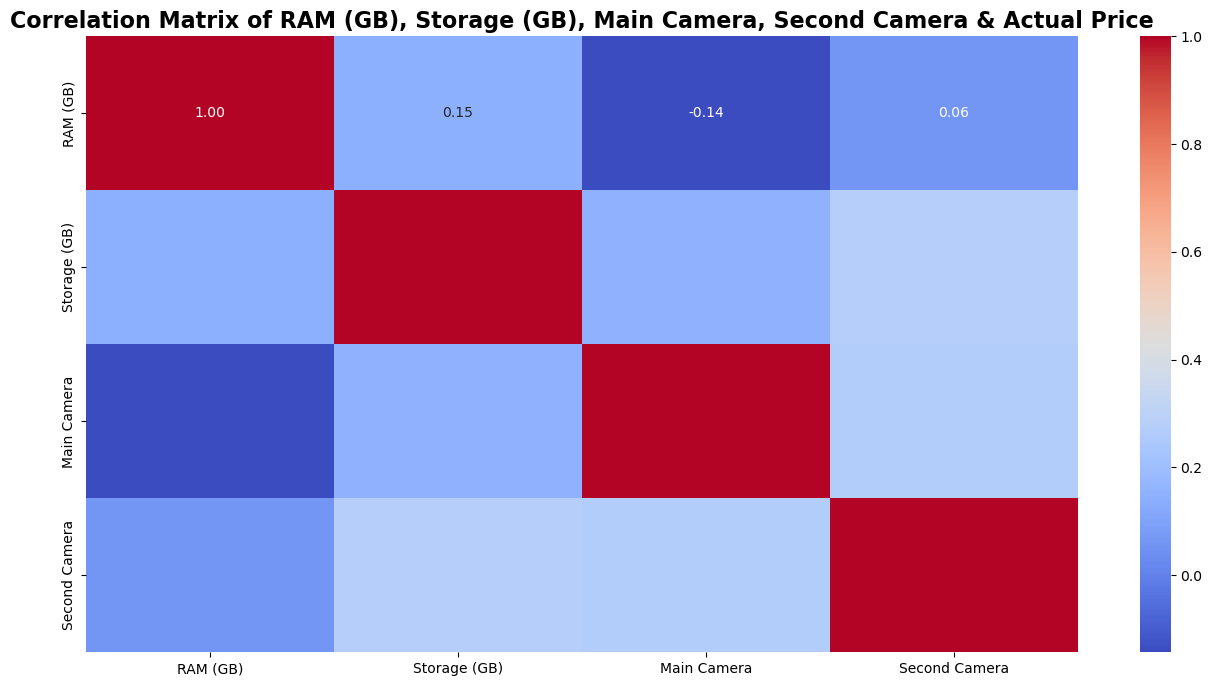

In [225]:
#Visualize correlation matrix by heatmap (RAM (GB), Storage (GB), Main Camera, Second Camera and Actual Price)
plt.figure(figsize=(16,8))
sns.heatmap(df[selected_columns].corr(), annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of RAM (GB), Storage (GB), Main Camera, Second Camera & Actual Price', size =16, weight='semibold')
plt.show()

### 5.4 Camera Analysis

In [226]:
#Handle null values in the Camera columns from the original (df_dup) one
df_cleaned_cam = df_dup.dropna(subset=['Main Camera'])
df_cleaned_cam['Second Camera'] = df_cleaned_cam['Second Camera'].replace(0,np.nan)
#Calculate percentage having one or two cameras
have_second_cam = df_cleaned_cam['Second Camera'].dropna()
percentage_two_cam = (len(have_second_cam)/len(df_cleaned_cam['Second Camera']))*100
percentage_two_cam = round(percentage_two_cam,2)
percentage_one_cam = 100 - percentage_two_cam
percentage_one_cam = round(percentage_one_cam,2)

value = [64.1,35.9]
name = ['One Camera', 'Two Cameras']
colors=['slateblue', 'plum']

fig = go.Figure(data=go.Pie(values=value, labels=name, marker_colors=colors))
fig.update_layout(title_font_size =24, title_text ='Percentage of Camera Trend', title_font_color="black", 
                  font_size=12,font_color="grey", height=500, template="plotly_white")

fig.show()
print(f'Percentage of Phones having two cameras: {percentage_two_cam}%')
print(f'Percentage of Phones having only one cameras: {percentage_one_cam}%')

Percentage of Phones having two cameras: 64.1%
Percentage of Phones having only one cameras: 35.9%


In [227]:
#Most Common Camera Resolution
common_main_camera= df_dup['Main Camera'].value_counts().reset_index()
common_second_camera= df_dup['Second Camera'].value_counts().reset_index()
print(common_main_camera)
print(common_second_camera)

highest_main_cam = common_main_camera[common_main_camera['Main Camera']==50]
other_main_cam = common_main_camera[common_main_camera['Main Camera']!=50]

highest_second_cam = common_second_camera[common_second_camera['Second Camera']==2]
other_second_cam = common_second_camera[common_second_camera['Second Camera']!=2]

#Visualise by drawing 2 bar charts side by side to compare
fig = make_subplots(rows=1, cols=2, subplot_titles = ('Main Cam', 'Second Cam'))
fig.add_bar(x=highest_main_cam['Main Camera'], y=highest_main_cam['count'], textposition='outside',
            marker_color='slateblue', text=highest_main_cam['count'], name='Most common main',row =1, col=1)
fig.add_bar(x=other_main_cam['Main Camera'], y=other_main_cam['count'], marker_color='lavender', name='Main cam resolution',row =1, col=1)
fig.add_bar(x=highest_second_cam['Second Camera'], y=highest_second_cam['count'], textposition='outside',
            marker_color='plum', text=highest_second_cam['count'], name='Most common second',row =1, col=2)
fig.add_bar(x=other_second_cam['Second Camera'], y=other_second_cam['count'], marker_color='thistle', name='Second cam resolution', opacity=0.7,row =1, col=2)

fig.update_xaxes(title_text ='Main Cam Resolution', type='category', row=1, col=1)
fig.update_xaxes(title_text ='Second Cam Resolution', type='category', row=1, col=2)
fig.update_yaxes(title_text ='Count', row=1, col=1)
fig.update_yaxes(title_text ='Count', row=1, col=2)
fig.update_layout(template='plotly_white', title='Most Common Camera Resolution', font_color="grey", font_size =12, title_font_color="black", title_font_size =24, height=600)
fig.show()
print('The most common main camera resolution is 50MP, while he most common second camera resolution is 2MP')

    Main Camera  count
0          50.0    480
1           8.0    107
2           3.0     54
3          64.0     51
4          32.0     35
5          13.0     34
6           2.0     26
7          12.0     26
8          48.0     23
9         200.0      5
10         16.0      2
11          5.0      1
    Second Camera  count
0             2.0    219
1             8.0    123
2            12.0     71
3            50.0     27
4            13.0     27
5             0.0     25
6             5.0     25
7            16.0     17
8            10.0     12
9            32.0     10
10           20.0      6
11           48.0      3
12           64.0      1


The most common main camera resolution is 50MP, while he most common second camera resolution is 2MP


In [228]:
#Calculate average star category of main and second cameras
main_star = df_dup.groupby('Main Camera')['Stars'].mean().round(1).sort_values().reset_index()
second_star = df_dup.groupby('Second Camera')['Stars'].mean().round(1).sort_values().reset_index()
main_star['Star Category'] = pd.cut(main_star['Stars'], bins=[0, 3.4, 3.8, 4.2, 4.6, 5], labels=['Poor', 'Not Preferred', 'Fair', 'Good', 'Excellent'])
second_star['Star Category'] = pd.cut(second_star['Stars'], bins=[0, 3.4, 3.8, 4.2, 4.6, 5], labels=['Poor', 'Not Preferred', 'Fair', 'Good', 'Excellent'])
print(main_star)
print(second_star)

not_preferred_main = main_star[main_star['Star Category']=='Not Preferred']
fair_main = main_star[main_star['Star Category']=='Fair']
good_main = main_star[main_star['Star Category']=='Good']

fair_second = second_star[second_star['Star Category']=='Fair']
good_second = second_star[second_star['Star Category']=='Good']

#Visualize average star category of main and second cameras
#To see which cam resolution is most preferred
fig=make_subplots(rows=1,cols=2, subplot_titles=('Main Camera', 'Second Camera'))
fig.add_bar(x=not_preferred_main['Main Camera'], y=not_preferred_main['Stars'], marker_color='darkgrey', name='Not Preferred Main Cam',row=1,col=1)
fig.add_bar(x=fair_main['Main Camera'], y=fair_main['Stars'], marker_color='slateblue', opacity=0.5, name='Fair Main Cam',row=1,col=1)
fig.add_bar(x=good_main['Main Camera'], y=good_main['Stars'], marker_color='slateblue', name='Good Main Cam',row=1,col=1)
fig.add_bar(x=fair_second['Second Camera'], y=fair_second['Stars'], marker_color='plum',opacity=0.5, name='Fair Second Cam',row=1,col=2)
fig.add_bar(x=good_second['Second Camera'], y=good_second['Stars'], marker_color='plum', name='Good Second Cam',row=1,col=2)

fig.update_xaxes(title_text='Main camera resolution', type='category', row=1,col=1)
fig.update_yaxes(title_text='Stars', type='category', categoryorder='array', categoryarray=[0, 3.6, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6],row=1,col=1)
fig.update_yaxes(title_text='Stars', type='category', categoryorder='array', categoryarray=[0, 4.0, 4.2, 4.3, 4.4,4.5], row=1,col=2)
fig.update_xaxes(title_text='Second camera resolution', type='category',row=1,col=2)
fig.update_layout(title='Star Category of Camera Resolution',title_font_size=24, title_font_color='black', font_size=12, font_color='grey')
fig.show()


    Main Camera  Stars  Star Category
0           5.0    3.6  Not Preferred
1           3.0    4.0           Fair
2           2.0    4.1           Fair
3          13.0    4.1           Fair
4           8.0    4.2           Fair
5          16.0    4.2           Fair
6          50.0    4.3           Good
7          64.0    4.3           Good
8          32.0    4.4           Good
9          48.0    4.5           Good
10        200.0    4.5           Good
11         12.0    4.6           Good
    Second Camera  Stars Star Category
0             0.0    4.0          Fair
1             5.0    4.2          Fair
2            16.0    4.2          Fair
3            20.0    4.2          Fair
4             2.0    4.3          Good
5             8.0    4.3          Good
6            13.0    4.3          Good
7            32.0    4.4          Good
8            48.0    4.4          Good
9            50.0    4.4          Good
10           10.0    4.5          Good
11           12.0    4.5          Good

In [229]:
#Calculate average actual price for main and second cam
#To see if the resolution of each cam affect the price or not
main_cam_price = df_dup.groupby('Main Camera')[['Actual price ₹','Discount price ₹']].mean().round(2).reset_index()
main_cam_price = main_cam_price.rename(columns={'Actual price ₹':'Main cam actual price', 'Discount price ₹': 'Main cam discount price'})
second_cam_price = df_dup.groupby('Second Camera')[['Actual price ₹','Discount price ₹']].mean().round(2).reset_index()
second_cam_price = second_cam_price.rename(columns={'Actual price ₹':'Second cam actual price', 'Discount price ₹': 'Second cam discount price'})
avg_main_second_cam_price = pd.concat([main_cam_price, second_cam_price],axis=1)
print(avg_main_second_cam_price)

#Visualize average actual price for main and second cam
colors_main_actual = ['silver',] *  len(main_cam_price)
colors_main_actual[11] = 'slateblue'

colors_main_discount = ['gainsboro',] *  len(main_cam_price)
colors_main_discount[11] = 'slateblue'

colors_second_actual = ['silver',] *  len(second_cam_price)
colors_second_actual[10] = 'plum'

colors_second_discount = ['gainsboro',] *  len(second_cam_price)
colors_second_discount[4] = 'plum'

fig = make_subplots(rows=1, cols=2, subplot_titles=('Main Camera','Second Camera'))
fig.add_bar(x=avg_main_second_cam_price['Main Camera'], y=avg_main_second_cam_price['Main cam actual price'], text = avg_main_second_cam_price['Main cam actual price'], marker_color=colors_main_actual, name='Actual Price', row=1, col=1)
fig.add_bar(x=avg_main_second_cam_price['Main Camera'], y=avg_main_second_cam_price['Main cam discount price'], text = avg_main_second_cam_price['Main cam discount price'], marker_color=colors_main_discount,opacity=0.7 ,name='Discount Price', row=1, col=1)
fig.add_bar(x=avg_main_second_cam_price['Second Camera'], y=avg_main_second_cam_price['Second cam actual price'], text = avg_main_second_cam_price['Second cam actual price'], marker_color=colors_second_actual, showlegend=False, row=1, col=2)
fig.add_bar(x=avg_main_second_cam_price['Second Camera'], y=avg_main_second_cam_price['Second cam discount price'], text = avg_main_second_cam_price['Second cam discount price'], marker_color=colors_second_discount, opacity=0.7,showlegend=False, row=1, col=2)

fig.update_traces(textposition='outside', texttemplate='%{text:.2f%}')
fig.update_xaxes(title_text ='Main cam resolution', type='category', row=1, col=1)
fig.update_xaxes(title_text ='Second cam resolution', type='category', row=1, col=2)
fig.update_yaxes(title_text ='Price', row=1, col=1)
fig.update_yaxes(title_text ='Price', row=1, col=2)
fig.update_layout(font_color="grey", template='plotly_white', font_size =10, title='Average Actual & Discount Price for Cam Resolution', title_font_color="black", title_font_size =24, height=600)
fig.show()

print('For the main camera resolution, the one having the highest mean actual and discount price is 200MP')
print('For the second camera resolution, the one having the highest mean actual price is 48MP, while that of discount price is 10MP')

    Main Camera  Main cam actual price  Main cam discount price  \
0           2.0               17646.38                 12822.96   
1           3.0                2933.31                  1651.70   
2           5.0                5999.00                  4799.00   
3           8.0               19820.16                 15918.54   
4          12.0               71796.04                 57537.46   
5          13.0               18153.82                 14593.85   
6          16.0                9999.00                  6999.00   
7          32.0               17970.43                 15124.71   
8          48.0               69873.61                 56990.35   
9          50.0               27679.40                 24501.21   
10         64.0               36039.31                 31076.25   
11        200.0              120599.00                108189.20   
12          NaN                    NaN                      NaN   

    Second Camera  Second cam actual price  Second cam discou

For the main camera resolution, the one having the highest mean actual and discount price is 200MP
For the second camera resolution, the one having the highest mean actual price is 48MP, while that of discount price is 10MP


In [230]:
#Calculate average discount % of main and second cam resolution
main_cam_discount_amount = df_dup.groupby('Main Camera')['Discount amount (%)'].mean().round(2).sort_values(ascending=False).reset_index()
second_cam_discount_amount = df_dup.groupby('Second Camera')['Discount amount (%)'].mean().round(2).sort_values(ascending=False).reset_index()
print(main_cam_discount_amount)
print(second_cam_discount_amount)

#Visualize average discount % of main and second cam resolution
fig = make_subplots(rows=1, cols=2, subplot_titles=('Main Camera','Second Camera'))
fig.add_bar(x=main_cam_discount_amount['Main Camera'], y=main_cam_discount_amount['Discount amount (%)'], name='Main Cam', text = main_cam_discount_amount['Discount amount (%)'], marker_color ='slateblue', row=1, col=1)
fig.add_bar(x=second_cam_discount_amount['Second Camera'], y=second_cam_discount_amount['Discount amount (%)'], name ='Second Cam', text=second_cam_discount_amount['Discount amount (%)'], marker_color='plum', row=1, col=2)

fig.update_traces(textposition='outside', texttemplate='%{text:.2f%}')
fig.update_xaxes(title_text ='Main cam resolution', type='category', row=1, col=1)
fig.update_xaxes(title_text ='Second cam resolution', type='category', row=1, col=2)
fig.update_yaxes(title_text ='Discount Amount', row=1, col=1)
fig.update_yaxes(title_text ='Discount Amount', row=1, col=1)
fig.update_layout(template='plotly_white', font_color="grey", font_size =10, title='Average Discount Amount of Cam Resolution', title_font_color="black", title_font_size =24, height=600)
fig.show()


    Main Camera  Discount amount (%)
0          16.0                30.00
1           2.0                27.15
2           3.0                27.07
3           8.0                21.83
4          13.0                21.26
5          48.0                21.07
6           5.0                20.00
7          12.0                19.25
8          32.0                15.85
9         200.0                14.74
10         64.0                12.46
11         50.0                10.24
    Second Camera  Discount amount (%)
0            48.0                43.53
1             0.0                23.17
2             2.0                21.67
3            16.0                20.75
4             5.0                18.26
5            20.0                16.70
6            50.0                15.45
7             8.0                14.56
8            32.0                12.69
9            64.0                 8.33
10           13.0                 4.76
11           12.0               -30.88
12          

## 6. Feature Engineering

In [231]:
df= df.drop(columns=['Camera', 'Product Name'])
print(df.info())
#Encode categorical data
categorical_col = ['Brand', 'Price Category', 'Star Category']
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Price Category'] = le.fit_transform(df['Price Category'])
df['Star Category'] = le.fit_transform(df['Star Category'])

#Scale data before modelling
x = df.drop('Actual price ₹', axis =1)
y = df['Actual price ₹']
scaler_x= StandardScaler()
x = pd.DataFrame(scaler_x.fit_transform(x), columns= x.columns)
scaler_y= StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))
print(f'Shape of x: {x.shape}')
print(f'Shape of y: {y.shape}')

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 6 to 977
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Brand                527 non-null    category
 1   Price Category       527 non-null    category
 2   Actual price ₹       527 non-null    int64   
 3   Discount price ₹     527 non-null    int64   
 4   Discount amount (%)  527 non-null    float64 
 5   Stars                527 non-null    float64 
 6   Star Category        527 non-null    category
 7   Number of Rating     527 non-null    int64   
 8   Number of Reviews    527 non-null    int64   
 9   RAM (GB)             527 non-null    int64   
 10  Storage (GB)         527 non-null    int64   
 11  Display Size (inch)  527 non-null    int64   
 12  Main Camera          527 non-null    int64   
 13  Second Camera        527 non-null    int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 52.0 KB
None
Shape of x: (52

## 7. Model Selection and Evaluation

In [232]:
#Split data into the train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
#Evaluate linear regression model using mse and r2
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'MSE Linear Regression:{mse_lr}, and R² Score:{r2_lr}')


# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
#Evaluate tree regressor using mse and r2
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'MSE Decision Tree Regressor: {mse_dt}, and R² Score:{r2_dt}')

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
#Evaluate forest regressor using mse and r2
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'MSE Random Forest Regressor: {mse_rf}, and R² Score:{r2_rf}')

MSE Linear Regression:0.036260548750932355, and R² Score:0.9608626985745053


MSE Decision Tree Regressor: 0.008711829657860276, and R² Score:0.9905970120411243
MSE Random Forest Regressor: 0.008055835100765942, and R² Score:0.9913050503251236
